# K-Nearest-Neighbors

👇 Load the `houses_clean.csv` dataset located in the `data` folder  
Or you can load it directly from this URL: [https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_clean.csv](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_clean.csv).  

The dataset description can be found [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset_description.txt).

In [3]:
import pandas as pd


url = "https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_clean.csv"
df = pd.read_csv(url)
print(houses_df.head())

   GrLivArea  BedroomAbvGr  KitchenAbvGr  OverallCond  CentralAir  SalePrice
0   0.380070         0.375      0.333333        0.500           1     208500
1  -0.312090         0.375      0.333333        0.875           1     181500
2   0.497489         0.375      0.333333        0.500           1     223500
3   0.390885         0.375      0.333333        0.500           1     140000
4   1.134029         0.500      0.333333        0.500           1     250000


💡 Most features are already preprocessed (scaled with normalization), as you did during the Data Preparation day  

💡 One feature, `GrLiveArea`, is not normalized. We keep it that way to see the impact of its normalization on our model performance later on  

👇 You can easily see this with descriptive statistics, check the min and max    

In [4]:
df.describe()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,CentralAir,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.078410,0.358305,0.348858,0.571918,0.934932,180921.195890
std,0.813952,0.101972,0.073446,0.139100,0.246731,79442.502883
min,-2.263422,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,-0.516802,0.250000,0.333333,0.500000,1.000000,129975.000000
50%,0.000000,0.375000,0.333333,0.500000,1.000000,163000.000000
75%,0.483198,0.375000,0.333333,0.625000,1.000000,214000.000000
max,6.455002,1.000000,1.000000,1.000000,1.000000,755000.000000


# Default KNN

🎯 The task is to predict the price of houses (`SalePrice`) with all the features.

👇 Use cross validation to evaluate a default [KNNRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html) on such a task.  
❓ What is the proportion of the variance in `SalePrice` that is explained by the features?  
Save your answer in a variable named `base_knn_score`.

<details>
<summary> 💡 Hint </summary>
    <br>
    ℹ️ The proportion of the variance in the dependent variable that is explained by the independent variables is the R2 score.
</details>

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

# Extract features and target variable
X = df.drop(columns='SalePrice')
y = df['SalePrice']

# Create the KNN regressor with default parameters
knn_regressor = KNeighborsRegressor()

# Perform cross-validation to evaluate the model
# We use the R2 score as the metric (default for regressors in cross_val_score)
scores = cross_val_score(knn_regressor, X, y, cv=5)

base_knn_score = scores.mean()
print("Base KNN Score (R2):", base_knn_score)

Base KNN Score (R2): 0.6085640394084016


### 🧪 Check your code

In [6]:
from nbresult import ChallengeResult

result = ChallengeResult('default_score',
                         score = base_knn_score)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/francoisgirard/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/francoisgirard/code/francoisgirard51/05-ML/03-Performance-metrics/data-knn/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_default_score.py::TestDefault_score::test_score PASSED              [100%]

============================== 1 passed in 0.17s ===============================


💯 You can commit your code:

git add tests/default_score.pickle

git commit -m 'Completed default_score step'

git push origin master



# Scale sensitivity

KNNs and distance-based algorithms can be extremely sensitive to the scale of the features. 

👇 Rescale the feature set within an **exact common range**, and save it under a variable named `X_rescaled`  
Then, evaluate a model on the rescaled features and save its score under variable name `rescaled_score`.

<details>
<summary> 💡 Hint </summary>
    
`MinMaxScaler()`

Even though only `GrLiveArea` needs to be normalized, using the MinxMaxScaler on all your features is fine  
    
Indeed, Min-Max Scaling is an [idempotent](https://en.wikipedia.org/wiki/Idempotence) transformation: if $X_{max}=1$ and $X_{min}=0$, then $X = \frac{X - X_{min}}{X_{max} - X_{min}}$
</details>


In [7]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

# Rescale the feature set
X_rescaled = scaler.fit_transform(X)

# Create the KNN regressor with default parameters
knn_regressor = KNeighborsRegressor()

# Evaluate the model on the rescaled features using cross-validation
rescaled_scores = cross_val_score(knn_regressor, X_rescaled, y, cv=5)

rescaled_score = rescaled_scores.mean()
print("Rescaled KNN Score (R2):", rescaled_score)

Rescaled KNN Score (R2): 0.6496841000103444


👉 The R2 score should have increased!

💡 It is preferable for features to be in an exact common range when modeling distance-based algorithms.  
However, it does not always guarantee a better score.  
It is a trial and error process.

### 🧪 Check your code

In [8]:
from nbresult import ChallengeResult

result = ChallengeResult('scale_sensitivity',
                         base_score = base_knn_score,
                         rescaled_features = X_rescaled,
                         rescaled_score = rescaled_score)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/francoisgirard/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/francoisgirard/code/francoisgirard51/05-ML/03-Performance-metrics/data-knn/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 2 items

test_scale_sensitivity.py::TestScale_sensitivity::test_rescaled_features PASSED [ 50%]
test_scale_sensitivity.py::TestScale_sensitivity::test_score_inscrease PASSED [100%]

============================== 2 passed in 0.23s ===============================


💯 You can commit your code:

git add tests/scale_sensitivity.pickle

git commit -m 'Completed scale_sensitivity step'

git push origin master



# Optimizing $k$

👇 Fine tune the parameter K (using the parameter `n_neighbors`) of a KNNRegressor on the rescaled features. Plot the evolution of the score as K increases from 1 until 25.

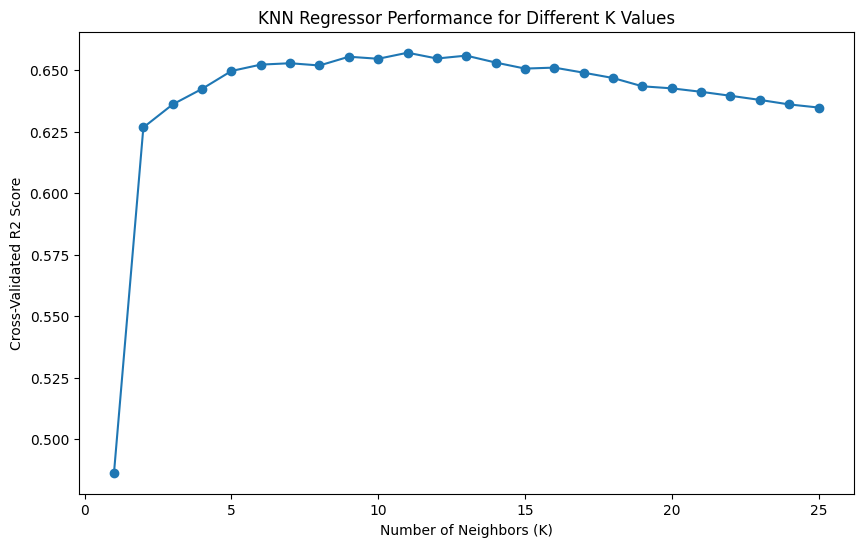

In [9]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor


k_values = range(1, 26)
scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    cv_scores = cross_val_score(knn, X_rescaled, y, cv=5)
    scores.append(cv_scores.mean())

plt.figure(figsize=(10, 6))
plt.plot(k_values, scores, marker='o')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Cross-Validated R2 Score')
plt.title('KNN Regressor Performance for Different K Values')
plt.show()

❓ Which value of K produces the best performance? Save your answer under variable name `best_k`.

In [11]:
import numpy as np


best_k = np.argmax(scores) + 1
print(f"The best performance is achieved at K = {best_k}")

The best performance is achieved at K = 11


<details>
<summary> 👉 Solution 👈</summary>
    
By looking at your graph, you should see that the score stops increasing around k = 5 and the maximum score is reached for k = 11.

</details>



❓ What is you interpretation of the poor performance of the model for values $k$ < 5?

<details>
<summary> 👉 Solution 👈</summary>
    
When K is too small, the model will tend to overfit to the training set. It will focus on too few points to be able to generalize well. Increasing K will give the model more examples to base its predictions on.

</details>



### 🧪 Check your code

In [12]:
from nbresult import ChallengeResult

result = ChallengeResult('optimal_k',
                         optimal_k = best_k)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/francoisgirard/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/francoisgirard/code/francoisgirard51/05-ML/03-Performance-metrics/data-knn/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_optimal_k.py::TestOptimal_k::test_optimal_K_around_10 PASSED        [100%]

============================== 1 passed in 0.40s ===============================


💯 You can commit your code:

git add tests/optimal_k.pickle

git commit -m 'Completed optimal_k step'

git push origin master



# Overfitting a KNN 

💡 When the parameter K of KNNs is too small, there is a risk of overfitting the training set and not being able to generalize well. 

👇 Plot the learning curves of a KNN with parameter K=2.

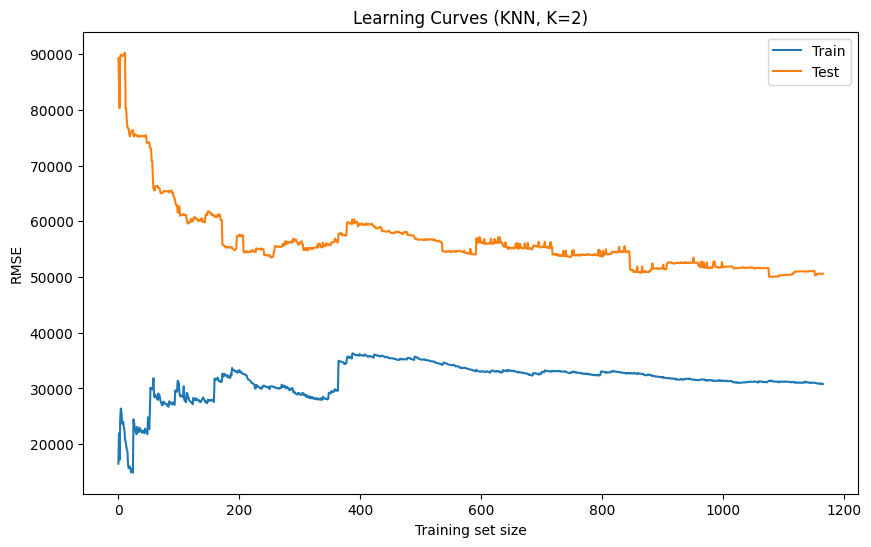

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN regressor with K=2
knn = KNeighborsRegressor(n_neighbors=2)

# Lists to store the scores for training and testing sets
train_errors, test_errors = [], []

# Train the model with increasing size of the training set, starting from 2
for m in range(2, len(X_train)):
    knn.fit(X_train[:m], y_train[:m])
    y_train_predict = knn.predict(X_train[:m])
    y_test_predict = knn.predict(X_test)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    test_errors.append(mean_squared_error(y_test, y_test_predict))

plt.figure(figsize=(10, 6))
plt.plot(np.sqrt(train_errors), label='Train')
plt.plot(np.sqrt(test_errors), label='Test')
plt.xlabel('Training set size')
plt.ylabel('RMSE')
plt.title('Learning Curves (KNN, K=2)')
plt.legend()
plt.show()

👉 You should observe a high training score, but a low testing score. ⚠️ Overfitting alert ⚠️ This is due to a parameter K that is too low.

# Ideal K

👇 This time, plot the learning curves for the ideal K value you found in the "Optimizing $k$" section.

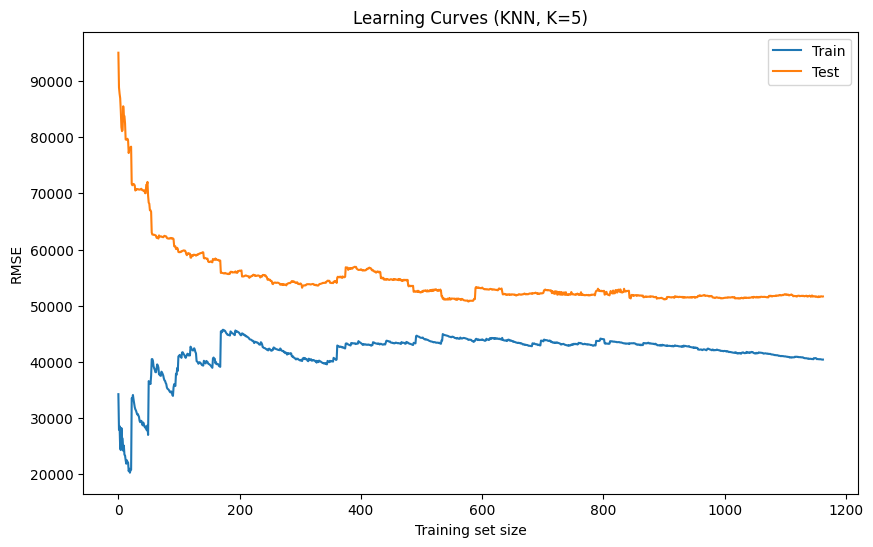

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN regressor with the ideal K value
ideal_k = 5  # Replace with your ideal K value
knn = KNeighborsRegressor(n_neighbors=ideal_k)

# Lists to store the scores for training and testing sets
train_errors, test_errors = [], []

# Train the model with increasing size of the training set, starting from ideal_k
for m in range(ideal_k, len(X_train)):
    knn.fit(X_train[:m], y_train[:m])
    y_train_predict = knn.predict(X_train[:m])
    y_test_predict = knn.predict(X_test)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    test_errors.append(mean_squared_error(y_test, y_test_predict))

plt.figure(figsize=(10, 6))
plt.plot(np.sqrt(train_errors), label='Train')
plt.plot(np.sqrt(test_errors), label='Test')
plt.xlabel('Training set size')
plt.ylabel('RMSE')
plt.title(f'Learning Curves (KNN, K={ideal_k})')
plt.legend()
plt.show()

👉 The curves should be close to converging, which indicates that the model is overfitting less and generalizing better.

💡 There are two key elements to remember when modelling with KNN models:  
    1. Distance-based algorithms are extremely sensitive to the scale of features  
    2. K must be tuned: it controls the tradeoff between performance, generalization, and overfitting

❓ What is the average difference between actual price and predicted price of the optimized KNN model? Compute your answer and save it under variable name `price_error`

<details>
<summary> 💡 Hint </summary>
    
The metric you should calculate is the **Negative Mean Absolute Error (MAE)**.

</details>

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

# Extract features and target variable
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN regressor with the ideal K value (replace with your actual ideal K value)
ideal_k = 5  # Replace with the ideal K value found earlier
knn = KNeighborsRegressor(n_neighbors=ideal_k)

# Train the model with the training set
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Calculating the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# The Negative Mean Absolute Error (Negative MAE)
price_error = -mae
price_error

-33204.98698630137

### 🧪 Check your code

In [22]:
from nbresult import ChallengeResult

result = ChallengeResult('price_error',
                         error = price_error)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/francoisgirard/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/francoisgirard/code/francoisgirard51/05-ML/03-Performance-metrics/data-knn/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_price_error.py::TestPrice_error::test_price_error_range PASSED      [100%]

============================== 1 passed in 0.38s ===============================


💯 You can commit your code:

git add tests/price_error.pickle

git commit -m 'Completed price_error step'

git push origin master



# Model Selection

❓ Which of those two models would you chose to perform the task of predicting house prices:
- The KNN model you just tuned
- A Linear Regression model

Save your answer as a string under variable name `best_model` as either "KNN" or "LinearReg".

<details>
<summary> 💡 Hint </summary>
    
To chose either or, you'll have to evaluate the score of a Linear Regression on the same task and compare it to the score of the KNN. Make sure you are comparing the same metrics!!

</details>




In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize and train Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predict using Linear Regression
y_pred_linear = linear_reg.predict(X_test)

# Calculate MSE for Linear Regression
mse_linear = mean_squared_error(y_test, y_pred_linear)

# Calculate MSE for KNN (reusing existing trained KNN model and its predictions)
mse_knn = mean_squared_error(y_test, y_pred)

# Choose the best model based on lower MSE
best_model = "LinearReg" if mse_linear < mse_knn else "KNN"

print(best_model)

KNN


💡 When comparing either metric of both models, the KNN model should outperform the Linear Regression. This could be due to its ability to capture non-linear patterns in the data.

### 🧪 Check your code

In [24]:
from nbresult import ChallengeResult

result = ChallengeResult('best_model',
                         model = best_model)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/francoisgirard/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/francoisgirard/code/francoisgirard51/05-ML/03-Performance-metrics/data-knn/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_best_model.py::TestBest_model::test_best_model PASSED               [100%]

============================== 1 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/best_model.pickle

git commit -m 'Completed best_model step'

git push origin master



# 🏁